In [2]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [3]:
train_dir = r"E:\waste-classifier\face_emotion\data\train"
test_dir  = r"E:\waste-classifier\face_emotion\data\test"
model_save_path = r"E:\waste-classifier\face_emotion\emotion_model_final.h5"

In [4]:
img_height, img_width = 48, 48
batch_size = 32
num_classes = 7
epochs = 30 

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 7178 images belonging to 7 classes.


In [9]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(img_height,img_width,1)),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



e:\waste-classifier\face_emotion\myvenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,351 (349.03 KB)

 Trainable params: 89,351 (349.03 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs
)

Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.2512 - loss: 1.8010 - val_accuracy: 0.2951 - val_loss: 1.7133
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.3007 - loss: 1.7257 - val_accuracy: 0.3777 - val_loss: 1.5997
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.3385 - loss: 1.6686 - val_accuracy: 0.4093 - val_loss: 1.5200
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.3667 - loss: 1.6109 - val_accuracy: 0.4483 - val_loss: 1.4454
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.3938 - loss: 1.5569 - val_accuracy: 0.4681 - val_loss: 1.3903
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.4077 - loss: 1.5216 - val_accuracy: 0.4735 - val_loss: 1.3718
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 38s 43ms/step - accuracy: 0.4223 - loss: 1.4864 - val_accuracy: 0.4870 - val_loss: 1.3278
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.4327 - loss: 1.4654 - 

In [11]:
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

Model saved to: E:\waste-classifier\face_emotion\emotion_model_final.h5


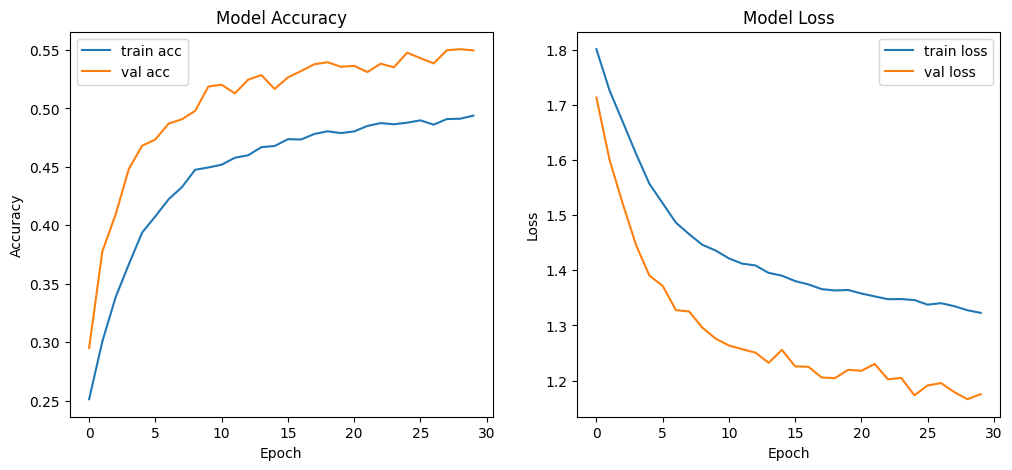

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()